In [134]:
from lxml import html
from bs4 import BeautifulSoup
import requests
with open(r'/Users/sjiang/Desktop/receipe/auntiesrecipes-master/recipe_download/www_bbc_co_uk_food_recipes_chumpoflambhotpotsty_74658.html', "r") as f:
    page = f.read()
tree = html.fromstring(page)

soup = BeautifulSoup(page,"lxml")
#ul=soup.find("ul","recipe-ingredients_list")
soup.title
soup.title.name
soup.title.string
soup.title.parent.name
soup.a
list1=soup.find('ul','recipe-ingredients__list')
#print(list1)
list2=list1.find_all('li','recipe-ingredients__list-item')
#print(list2)
len(list2)
print(list2[0])
list2[0].name
list2[0].attrs
list2[0]['class']
list2[0]['itemprop']
#print(list2[0].contents[0]) #here is the amount
#print(list2[0].contents[1].contents[0]) #here is the ingredients

import json
data={}
data['title']=soup.title.string
for temp in list2:
    
    if (len(temp.contents)==1):
        if temp.contents==[' ']:
            continue
        data[temp.contents[0].split()[-1]]=temp.contents[0].split()[0]
    else:    
        data[temp.contents[1].contents[0]]=temp.contents[0]
    
    
with open('data.json', 'w') as f:
    json.dump(data, f)

#ul.findall("li")
#category_links=[aa+dd.    for dd in ul.findall("li")]

<li class="recipe-ingredients__list-item" itemprop="ingredients"> 4 x 280g/10oz lamb chump chops</li>


In [133]:
list2[0]

<li class="recipe-ingredients__list-item" itemprop="ingredients"> 4 x 280g/10oz lamb chump chops</li>

In [96]:
tree.findall('ingredient')

[]

In [6]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

section_url = "http://www.chicagoreader.com"
html = urlopen(section_url).read()

soup = BeautifulSoup(html, "lxml")

#print(soup.prettify())

soup.title
boccat = soup.find("dl", "boccat")
print(boccat)
#boccat.findAll("dd")
#type(boccat)
#def get_category_links(section_url):
#    html = urlopen(section_url).read()
#    soup = BeautifulSoup(html, "lxml")

#boccat = soup.find("dl", "boccat")
#    category_links = [BASE_URL + dd.a["href"] for dd in boccat.findAll("dd")]
#    return category_links

None


In [7]:
import os
path = '/Users/sjiang/Desktop/receipe/auntiesrecipes-master/recipe_download'
for filename in os.listdir(path):
    print(filename)

.DS_Store
www_bbc_co_uk_food_recipes_italian-style_stuffed_63676.html
www_bbc_co_uk_food_recipes_italian_sausage_broad_76643.html
www_bbc_co_uk_food_recipes_italian_style_meatballs_69955.html
www_bbc_co_uk_food_recipes_italian_summer_10941.html


In [135]:
import os
import json
from lxml import html
from bs4 import BeautifulSoup
import requests
path1 = r'/Users/sjiang/Desktop/receipe/auntiesrecipes-master/recipe_download/'
Totaldata=[]
schema=[]
num_file=0
for filename in os.listdir(path1):
    if not filename.startswith('.') and os.path.isfile(os.path.join(path1, filename)):
        with open(path1+filename, "r") as f:
            page = f.read()
        tree = html.fromstring(page)
        soup = BeautifulSoup(page,"lxml")
        list1=soup.find('ul','recipe-ingredients__list')
        if list1==None:
            continue
        list2=list1.find_all('li','recipe-ingredients__list-item')
        data={}
        data['title']=soup.title.string
        for temp in list2:
            if (len(temp.contents)==1):
                if temp.contents==[' ']:
                    continue
                tt=temp.contents[0].split()[-1]
                data[tt]=temp.contents[0].split()[0]
            else:
                tt=temp.contents[1].contents[0]
                data[tt]=temp.contents[0]
            if tt not in schema:
                schema.append(tt)
        Totaldata.append(data)
        num_file+=1

In [136]:
num_file

11112

In [130]:
filename

'www_bbc_co_uk_food_recipes_chumpoflambhotpotsty_74658.html'

In [89]:
path1 = '/Users/sjiang/Desktop/receipe/auntiesrecipes-master/recipe_download/'
for filename in os.listdir(path1):
    if not filename.startswith('.') and os.path.isfile(os.path.join(path1, filename)):
        print(filename)

www_bbc_co_uk_food_recipes_10minutepizza_87314.html
www_bbc_co_uk_food_recipes_15_minute_pasta_33407.html
www_bbc_co_uk_food_recipes_italian-style_stuffed_63676.html
www_bbc_co_uk_food_recipes_italian_sausage_broad_76643.html
www_bbc_co_uk_food_recipes_italian_style_meatballs_69955.html
www_bbc_co_uk_food_recipes_italian_summer_10941.html


In [90]:
num_file

6

In [137]:
with open('data.json', 'w') as f:
    json.dump(Totaldata, f)

In [62]:
Totaldata[0]['title']

'BBC Food - Recipes - Ten-minute pizza'

In [138]:
len(schema)

1818

In [139]:
import pandas as pd
DF=pd.DataFrame(columns=schema)

In [140]:
DF.head()

,plain flour,olive oil,water,salt,pasta,ham,chestnut mushrooms,crème fraîche,Parmesan,parsley,...,sizes,wild duck,wild ducks,anis,stewing lamb,noodle soup,dumplings,recipe.,Za’atar,agar-agar


In [141]:
import re
for ii in range(num_file):
    temp=Totaldata[ii].copy()
    temptitle=temp['title'][21:]
    DF.loc[temptitle]=0
    del temp['title']
    for key in temp.keys():
        keyvalue=re.findall('\d+', temp[key])
        if len(keyvalue)==0:
            keyvalue.append('0.1')
        DF.loc[temptitle,key]=keyvalue[0]

KeyboardInterrupt: 

In [143]:
DF.head

<bound method NDFrame.head of                                                    plain flour olive oil  \
Ten-minute pizza                                           250         8   
15 minute pasta                                              0         0   
3D biscuits                                                400         0   
Lemon curd ice cream                                         0         0   
 Banoffee millefeuilles with chocolate and cara...         800         0   
 Chicken chasseur with creamy mash                          50         2   
Cold-smoked salmon with homemade butter and bro...           0         0   
 Fillet of beef stroganoff with riz pilaff                   0         0   
Venison massaman curry                                       0         0   
A medley of shellfish with baby vegetables                   0         2   
Simple layered salad                                         0         0   
Aberdeen butteries (Rowies)                               

In [67]:
#DF.loc[temptitle]=0

DF.head

<bound method NDFrame.head of                                                    plain flour olive oil  \
Ten-minute pizza                                           250         8   
Italian-style stuffed marrow                                 1         0   
Italian sausage, broad beans and peas                        0         2   
Italian style meatballs with courgette ‘tagliat...           0         0   
Italian summer strawberry 'tiramisu'                         0         0   

                                                   water salt sunflower oil  \
Ten-minute pizza                                       2    1             0   
Italian-style stuffed marrow                           0    0             1   
Italian sausage, broad beans and peas                  0    0             0   
Italian style meatballs with courgette ‘tagliat...     0    0             0   
Italian summer strawberry 'tiramisu'                   0    0             0   

                                      

In [144]:
DF.to_csv('8000out_csv.csv')

In [1]:
import pandas as pd
DF=pd.read_csv('8000out_csv.csv')

In [2]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

sklearn_pca = sklearnPCA(n_components=5)
sklearn_transf = sklearn_pca.fit_transform(DF)

ValueError: could not convert string to float: 'Salted caramel and apple rolls'

In [149]:
sklearn_transf.shape

(8125, 5)

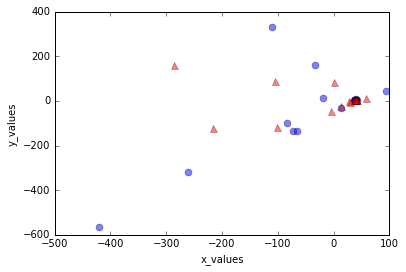

In [150]:

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
#plt.legend()
#plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

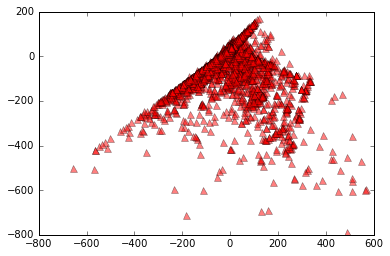

In [162]:
plt.plot(sklearn_transf[:,1], sklearn_transf[:,0], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.show()

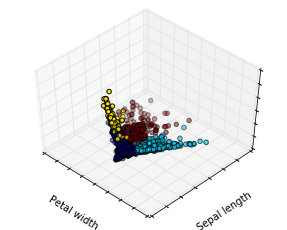

In [167]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

est=KMeans(n_clusters=4)
name='cluster=4'
fignum=1

fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
est.fit(sklearn_transf)
labels = est.labels_

ax.scatter(sklearn_transf[:, 1], sklearn_transf[:, 0], sklearn_transf[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
fignum = fignum + 1

In [199]:
index1=where(labels==1)
index1[0]

array([   0,    2,    4,   11,   15,   33,   35,   48,   66,   79,   86,
         90,   93,   94,   95,   99,  100,  102,  104,  108,  111,  115,
        116,  122,  134,  141,  143,  146,  155,  160,  170,  176,  177,
        180,  187,  188,  226,  243,  262,  287,  319,  320,  326,  332,
        353,  357,  391,  466,  478,  481,  497,  502,  506,  511,  515,
        518,  535,  574,  579,  608,  661,  664,  707,  709,  723,  727,
        729,  730,  732,  735,  747,  778,  784,  792,  796,  797,  798,
        799,  801,  814,  815,  820,  823,  825,  826,  848,  879,  885,
        890,  894,  923,  942,  958,  965, 1020, 1023, 1087, 1088, 1091,
       1123, 1164, 1175, 1182, 1188, 1196, 1202, 1205, 1208, 1224, 1225,
       1232, 1288, 1293, 1296, 1300, 1302, 1323, 1349, 1355, 1357, 1358,
       1376, 1396, 1397, 1398, 1400, 1435, 1446, 1460, 1551, 1552, 1559,
       1572, 1575, 1576, 1578, 1588, 1591, 1602, 1606, 1648, 1651, 1655,
       1704, 1708, 1718, 1719, 1721, 1735, 1752, 17

In [200]:
group1=DF.iloc[index1[0],:]
group1.shape

(648, 1818)

In [201]:
group2=group1[group1.columns[(group1 != 0).any()]]

In [202]:
group2.shape

(648, 400)

In [212]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W=model.fit_transform(group2.T) 

In [213]:
H=model.components_

In [214]:
W.shape


(400, 10)

In [220]:
NMFindex=group2.columns
W_DF=pd.DataFrame(W, index=NMFindex)

In [228]:
temp=W_DF.loc[:,1]
filteredtemp=temp[temp>0.09]

In [245]:
sum(sum(W_DF<0.09))

3588

In [258]:
sma=1000000
opi_ncom=0
for ncom in range(100,200):
    model = NMF(n_components=ncom, init='random', random_state=0)
    W=model.fit_transform(group2.T) 
    W_DF=pd.DataFrame(W, index=NMFindex)
    tempsma=sum(sum(W_DF>0.09))/ncom  # blank percentage
    if tempsma<sma:
        opi_ncom=ncom
        sma=tempsma

In [257]:
print(opi_ncom)
print(sma)

99
5.8686868686868685


In [259]:
print(opi_ncom)
print(sma)

195
3.4461538461538463


In [262]:
model195 = NMF(n_components=195, init='random', random_state=0)
W=model.fit_transform(group2.T) 
W_DF=pd.DataFrame(W, index=NMFindex)
W_DF[W_DF<0.09]=0
W_DF_SUM=sum(W_DF>0, axis=0)

In [266]:
sum(W_DF_SUM==1)

44

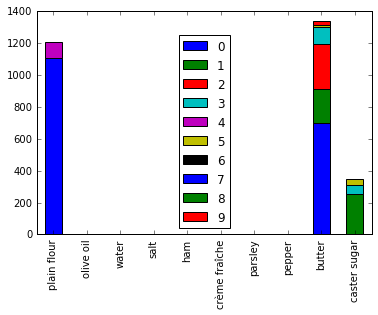

In [270]:
W_DF.iloc[0:10,0:10].plot(kind='bar', stacked=True)

In [286]:
W_DF.sort_values(W_DF.columns[0], inplace=True, ascending=False)  

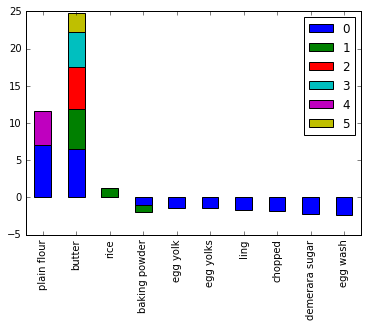

In [291]:
log(W_DF.iloc[0:10,0:6]).plot(kind='bar', stacked=True)

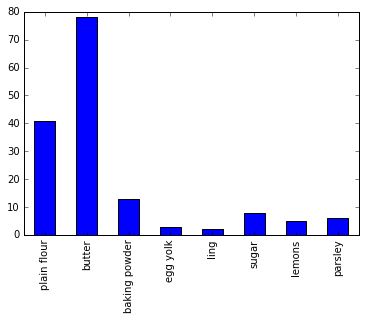

In [307]:
ins=[0,1,3,4,6,13,20,22]
sum(W_DF>0,axis=1)[ins].plot(kind='bar')

In [304]:
sum(W_DF>0,axis=1)

plain flour        41
butter             78
rice                2
baking powder      13
egg yolk            3
egg yolks           2
ling                2
chopped             3
demerara sugar      3
egg wash            1
bacon               3
vanilla pod         1
salt                4
sugar               8
beetroot            1
carrots             3
arrowroot           1
water               5
lemon               1
ham                 2
lemons              5
crème fraîche       2
parsley             6
pepper              0
dill                0
vanilla essence     0
egg                 3
double cream        3
orange juice        2
lard                4
                   ..
oatmeal             1
whisked             0
almond extract      0
total)              1
strawberry jam      0
flowers             0
tonic               1
stars               0
chive               1
Glendale)           1
almond essence      0
unpeeled            2
possible.           0
quatre-épices       0
sifted    